## Keyword Tweet Word Cloud ##

A program for generating tweet based word clouds.

The program may be ammended to create any number of word clouds given an input txt file. A csv file may be used as well, the relavent information from which is parsed and saved into a txt file for use by the word cloud function.

In [1]:
# Author: Elizabeth Brooks
# Date Modified: 07/06/2015
# Edited: Hayden Fuss

# PreProcessor Directives
%matplotlib inline
import matplotlib
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.misc import imread
import re
# Add parent directory to path for twc imports
import os
import sys
sys.path.append(os.path.realpath('../'))
import twittercriteria as twc

# Global field declarations
twc.loadCriteria()
keyword = twc.getKeywordRegex()
twc.clearCriteria()

# Function to clean up tweet strings 
# by manually removing irrelevant data (not words)
def cleanUpTweet(tweet_text):
    # Irrelevant characters
    twitterMarkup = ['&amp;', 'http://t.co/']
    temp = tweet_text.lower()
    # Use regex to create a regular expression 
    # for removing undesired characters
    temp = re.sub('|'.join(twitterMarkup), r"", temp)
    return temp
# End cleanUpTweet
## The markup and the cleanUpTweet function will eventually 
## be moved to twc

# Function to search for tweets based on pre-determined key words
def tweetHasAKeyword(tweet_text):
    return keyword.search(tweet_text) is not None
# End tweetHasAKeyword


The function .cleanUpTweet(String) is used to remove irrelevant data, characters that are not words and are therefore not interesting. In order to produce a more refined word cloud, the .tweetHasAKeyword(String) searches the data set of cleaned tweet strings for those tweets containing our pre-determined set of key words (see below).

keywords: ["#bostonmarathon",
           "#marathonmonday",
           "#patriotsday",
           "marathon",
           "boylston",
           "finish line",
           "#bostonstrong",
           "#bostonpride",
           "#prayforboston",
           "#pray4bos",
           "bomb",
           "explosion",
           "explode",
           "wounded",
           "hostage",
           "watertown",
           "lockdown",
           "manhunt",
           "collier"]

In [2]:
# Function for generating a word cloud of tweet term fequencies
def tweetWordCloud(file_path, mask_path, bg_color='white', num_words=150,
                   input_font_path, out_path='tweetCloud.png'):
    # Read in the txt file set by the main method
    text = open(file_path, 'r').read()
    # Generate the word cloud based on the input arguments
    wc = None
    if mask_path:
        # Use module to read the image file
        inputMask = imread(mask_path)
        wc = WordCloud(mask=inputMask, background_color=bg_color, max_words=num_words, 
                       font_path=input_font_path).generate(text)
    else:
        wc = WordCloud(font_path=fontpath, max_words=num_words,
                       background_color=bg_color).generate(text)
    # Open a plot of the generated word cloud
    wc.to_file(out_path)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
# End tweetWordCloud
## We can eventually move this to its own module


The above function generates a word cloud based on words in the txt file created in the main method.
For more info see: https://github.com/amueller/word_cloud

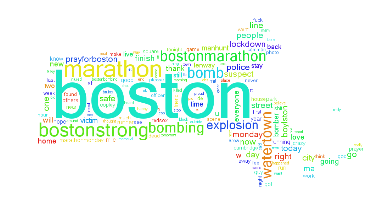

In [3]:
# The main method
def main():
    # Set the output image file path
    current_dir = os.getcwd()
    txtFilePath = current_dir + '/OutputTweets.txt'
    # Create object for writting to a text file
    tweetTxtFile = open(txtFilePath, "w")
    
    # Request user input of the file name of the data to be processed
    inputFile = raw_input("Enter csv file name...\nEx: cleaned_geo_tweets_Apr_12_to_22")
    # Also, request the OS specific font path for the generated word cloud
    # Mac and Windows font paths suggested
    fontPathInput = raw_input("Enter font file path...\nMac -- /Library/Fonts/Microsoft Sans Serif.ttf\nWindows -- sans_serif.ttf\n")
    # Also, request the file path to a mask for the word cloud
    maskPathInput = raw_input("Enter mask file name...\nEx: 'mass_map.png'")
    
    # Iterate through the Twitter data csv files by tweet text
    with open(current_dir + '/../' + inputFile + '.csv') as csvfile:  
        tweetIt = csv.DictReader(csvfile)
        # Retrieve the strings of tweets
        for twitterData in tweetIt:
            # Convert tweets to lower case to pool words of the same spelling
            # Send the tweet text to the function for removing unncessary characters
            tweetText = cleanUpTweet(twitterData['tweet_text'])
            # Write the selected Twitter data, tweets, to the txt file
            if tweetHasAKeyword(tweetText):
                tweetTxtFile.write(tweetText)
    # Close the file obj
    tweetTxtFile.close()  
    # Use the defined function to create the tweet word cloud
    # in the shape of Massachusets
    tweetWordCloud(file_path=txtFilePath, mask_path=current_dir + maskPathInput, input_font_path=fontPathInput)
# End main

# Run the script via the main method
if __name__ == "__main__":
    main()
    
# End script

The above code creates a file object and opens a txt file to store all the strings of tweets contained in the Twitter data from the "cleaned" tweets csv file. The tweet strings are then retrieved from the csv file by iterating through the tweet hashes made by the DictReader. Finally, these strings are converted to lower case. This is because we are interested in looking at the occurances of a given spelling of a word, regardless of case; stemming may be considered in the future to combine the frequencies of all conjugate forms of a words.